# Case study: How does a bike-share navigate speedy success?


#### Bussiness task 
The company wants to attract more annual riders(annual membership) since they are more profitable. The goal? To analyze their data to design marketing strategies aimed at converting casual riders into annual members. 

#### Ask 
Three questions will guide the future marketing program:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?



# Preparing the data 



From their [official website](https://divvy-tripdata.s3.amazonaws.com/index.html) I downloaded the last 12 months of trips data. From Feb 2024 to Mar 2023. 



In [1]:
# Import pandas 
import os
import pandas as pd

import matplotlib.pyplot as plt

In [3]:


# List to hold DataFrames
dfs = []

# Directory containing the CSV files
directory = 'Data/'

# Loop through each CSV file from March 2023 to December 2023
for year_month in range(202303, 202313):
    filename = f"{year_month}-divvy-tripdata.csv"
    filepath = os.path.join(directory, filename)
    try:
        df = pd.read_csv(filepath)
        dfs.append(df)
    except FileNotFoundError:
        print(f"File {filename} not found. Skipping...")

# Loop through each CSV file from January 2024 to February 2024
for year_month in range(202401, 202403):
    filename = f"{year_month}-divvy-tripdata.csv"
    filepath = os.path.join(directory, filename)
    try:
        df = pd.read_csv(filepath)
        dfs.append(df)
    except FileNotFoundError:
        print(f"File {filename} not found. Skipping...")

# Merge DataFrames
merged_df = pd.concat(dfs, ignore_index=True)
    


Let's check the merged dataset

In [4]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5707168 entries, 0 to 5707167
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 566.0+ MB


In [5]:
merged_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6842AA605EE9FBB3,electric_bike,2023-03-16 08:20:34,2023-03-16 08:22:52,Clark St & Armitage Ave,13146,Larrabee St & Webster Ave,13193,41.918413,-87.636451,41.921822,-87.644140,member
1,F984267A75B99A8C,electric_bike,2023-03-04 14:07:06,2023-03-04 14:15:31,Public Rack - Kedzie Ave & Argyle St,491,NaN,NaN,41.970000,-87.710000,41.950000,-87.710000,member
2,FF7CF57CFE026D02,classic_bike,2023-03-31 12:28:09,2023-03-31 12:38:47,Orleans St & Chestnut St (NEXT Apts),620,Clark St & Randolph St,TA1305000030,41.898203,-87.637536,41.884576,-87.631890,member
3,6B61B916032CB6D6,classic_bike,2023-03-22 14:09:08,2023-03-22 14:24:51,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Kingsbury St,13154,41.888716,-87.644448,41.910522,-87.653106,member
4,E55E61A5F1260040,electric_bike,2023-03-09 07:15:00,2023-03-09 07:26:00,Walsh Park,18067,Sangamon St & Lake St,TA1306000015,41.914480,-87.668013,41.885779,-87.651025,member


Ok, let's save it as a csv so we don't have to run this code every time we open the notebook (the code takes some time). 

In [6]:
merged_df.to_csv('Data/cyclistic-data.csv',index=False)

In [7]:
trips_df = pd.read_csv('Data/cyclistic-data.csv')
trips_df.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6842AA605EE9FBB3,electric_bike,2023-03-16 08:20:34,2023-03-16 08:22:52,Clark St & Armitage Ave,13146,Larrabee St & Webster Ave,13193,41.918413,-87.636451,41.921822,-87.644140,member
1,F984267A75B99A8C,electric_bike,2023-03-04 14:07:06,2023-03-04 14:15:31,Public Rack - Kedzie Ave & Argyle St,491,NaN,NaN,41.970000,-87.710000,41.950000,-87.710000,member
2,FF7CF57CFE026D02,classic_bike,2023-03-31 12:28:09,2023-03-31 12:38:47,Orleans St & Chestnut St (NEXT Apts),620,Clark St & Randolph St,TA1305000030,41.898203,-87.637536,41.884576,-87.631890,member
3,6B61B916032CB6D6,classic_bike,2023-03-22 14:09:08,2023-03-22 14:24:51,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Kingsbury St,13154,41.888716,-87.644448,41.910522,-87.653106,member
4,E55E61A5F1260040,electric_bike,2023-03-09 07:15:00,2023-03-09 07:26:00,Walsh Park,18067,Sangamon St & Lake St,TA1306000015,41.914480,-87.668013,41.885779,-87.651025,member


## Processing and cleaning  
After preparing the data, we need to check any inconsistencies in it. 

In [8]:
#Formatting
#We need to change the started_at and ended_at columns to datetime format.
trips_df['started_at'] = pd.to_datetime(trips_df['started_at'])
trips_df['ended_at'] = pd.to_datetime(trips_df['ended_at'])

#Also, let's separate the datetime column into a date column and a time columns
# Convert the datetime column to a date column
trips_df['started_date'] = trips_df['started_at'].dt.date
trips_df['ended_date'] = trips_df['ended_at'].dt.date
# Convert the datetime column to a time column
trips_df['started_time'] = trips_df['started_at'].dt.time
trips_df['ended_time'] = trips_df['ended_at'].dt.time

#Add a week_of_the_day column
trips_df['weekday'] = trips_df['started_at'].dt.weekday


trips_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_date,ended_date,started_time,ended_time,weekday
0,6842AA605EE9FBB3,electric_bike,2023-03-16 08:20:34,2023-03-16 08:22:52,Clark St & Armitage Ave,13146,Larrabee St & Webster Ave,13193,41.918413,-87.636451,41.921822,-87.644140,member,2023-03-16,2023-03-16,08:20:34,08:22:52,3
1,F984267A75B99A8C,electric_bike,2023-03-04 14:07:06,2023-03-04 14:15:31,Public Rack - Kedzie Ave & Argyle St,491,NaN,NaN,41.970000,-87.710000,41.950000,-87.710000,member,2023-03-04,2023-03-04,14:07:06,14:15:31,5
2,FF7CF57CFE026D02,classic_bike,2023-03-31 12:28:09,2023-03-31 12:38:47,Orleans St & Chestnut St (NEXT Apts),620,Clark St & Randolph St,TA1305000030,41.898203,-87.637536,41.884576,-87.631890,member,2023-03-31,2023-03-31,12:28:09,12:38:47,4
3,6B61B916032CB6D6,classic_bike,2023-03-22 14:09:08,2023-03-22 14:24:51,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Kingsbury St,13154,41.888716,-87.644448,41.910522,-87.653106,member,2023-03-22,2023-03-22,14:09:08,14:24:51,2
4,E55E61A5F1260040,electric_bike,2023-03-09 07:15:00,2023-03-09 07:26:00,Walsh Park,18067,Sangamon St & Lake St,TA1306000015,41.914480,-87.668013,41.885779,-87.651025,member,2023-03-09,2023-03-09,07:15:00,07:26:00,3


In [9]:
#Making a Duration column
trips_df['duration'] = trips_df['ended_at']-trips_df['started_at']
#Also in seconds
trips_df['duration_seconds'] = trips_df['duration'].dt.total_seconds()

trips_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_date,ended_date,started_time,ended_time,weekday,duration,duration_seconds
0,6842AA605EE9FBB3,electric_bike,2023-03-16 08:20:34,2023-03-16 08:22:52,Clark St & Armitage Ave,13146,Larrabee St & Webster Ave,13193,41.918413,-87.636451,41.921822,-87.644140,member,2023-03-16,2023-03-16,08:20:34,08:22:52,3,0 days 00:02:18,138.0
1,F984267A75B99A8C,electric_bike,2023-03-04 14:07:06,2023-03-04 14:15:31,Public Rack - Kedzie Ave & Argyle St,491,NaN,NaN,41.970000,-87.710000,41.950000,-87.710000,member,2023-03-04,2023-03-04,14:07:06,14:15:31,5,0 days 00:08:25,505.0
2,FF7CF57CFE026D02,classic_bike,2023-03-31 12:28:09,2023-03-31 12:38:47,Orleans St & Chestnut St (NEXT Apts),620,Clark St & Randolph St,TA1305000030,41.898203,-87.637536,41.884576,-87.631890,member,2023-03-31,2023-03-31,12:28:09,12:38:47,4,0 days 00:10:38,638.0
3,6B61B916032CB6D6,classic_bike,2023-03-22 14:09:08,2023-03-22 14:24:51,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Kingsbury St,13154,41.888716,-87.644448,41.910522,-87.653106,member,2023-03-22,2023-03-22,14:09:08,14:24:51,2,0 days 00:15:43,943.0
4,E55E61A5F1260040,electric_bike,2023-03-09 07:15:00,2023-03-09 07:26:00,Walsh Park,18067,Sangamon St & Lake St,TA1306000015,41.914480,-87.668013,41.885779,-87.651025,member,2023-03-09,2023-03-09,07:15:00,07:26:00,3,0 days 00:11:00,660.0


# Duplicates

In [10]:
#Duplicates?

# Check for duplicates
duplicates_mask = trips_df.duplicated()

# Filter DataFrame to show only duplicate rows
duplicates_df = df[duplicates_mask]

# Print only duplicate rows
print("Duplicate rows:")
print(duplicates_df)

C:\Users\jayar\AppData\Local\Temp\ipykernel_24592\2106501463.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  duplicates_df = df[duplicates_mask]


Duplicate rows:
Empty DataFrame
Columns: [ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual]
Index: []


If you run the code, you will see that there aren't any duplicates. 

Let's now check for structural errors. 

# Missing Values

In [11]:
#Missing values?

missing_values = trips_df.isnull().sum()

missing_values

#If you run the code, you will see that there is a significant number of times in which
#either the start_station_name (and their id) and end_station_name (and their id)
#are missing. 

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    866105
start_station_id      866105
end_station_name      920524
end_station_id        920524
start_lat                  0
start_lng                  0
end_lat                 7353
end_lng                 7353
member_casual              0
started_date               0
ended_date                 0
started_time               0
ended_time                 0
weekday                    0
duration                   0
duration_seconds           0
dtype: int64

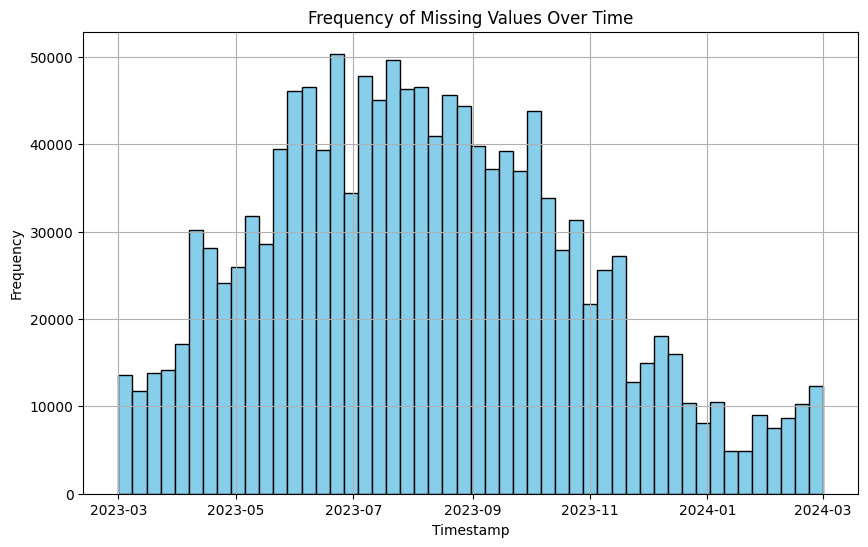

In [12]:
#It would be nice to know more a bit these trips with misssing starting or end station.


# Filter DataFrame to show only rows with missing values
missing_values_df = trips_df[trips_df.isnull().any(axis=1)]

# Plot a histogram of the frequency of missing values over time
plt.figure(figsize=(10, 6))
missing_values_df['started_at'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Frequency of Missing Values Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

After you run the code above, you will see an histogram with the frequency of trips with missing stations. And they happened pretty much across the whole period. With more cases in the months where there are more trips.  



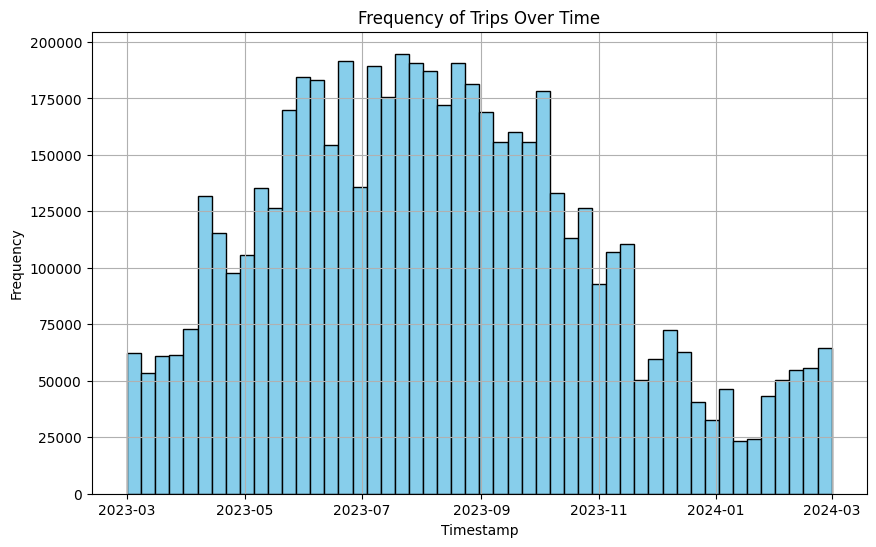

In [13]:
# Plot a histogram of the frequency of trips over time
plt.figure(figsize=(10, 6))
trips_df['started_at'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Frequency of Trips Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

In [14]:
#I want to know more things about this missing values

# Count the occurrences of rideable types in missing_values_df and trips_df
rideable_type_counts_missing = missing_values_df['rideable_type'].value_counts()
rideable_type_counts_trips = trips_df['rideable_type'].value_counts()

# Create a DataFrame with the counts
checking_rideable = pd.DataFrame({
    'missing_values_df': rideable_type_counts_missing,
    'trips_df': rideable_type_counts_trips,
})

# Calculate the percentage and add a new column
checking_rideable['percentage'] = (checking_rideable['missing_values_df'] / checking_rideable['trips_df']) * 100

# Fill missing values with 0 (if any)
checking_rideable = checking_rideable.fillna(0)

# Print the DataFrame
print(checking_rideable)



               missing_values_df  trips_df  percentage
rideable_type                                         
electric_bike            1367053   2900146   47.137385
classic_bike                5645   2732668    0.206575
docked_bike                 2063     74354    2.774565


In [15]:
# Count the occurrences of member types in missing_values_df and trips_df
member_type_counts_missing = missing_values_df['member_casual'].value_counts()
member_type_counts_trips = trips_df['member_casual'].value_counts()

# Create a DataFrame with the counts
checking_members_df = pd.DataFrame({
    'missing_values_df': member_type_counts_missing,
    'trips_df': member_type_counts_trips
})

# Fill missing values with 0
checking_members_df = checking_members_df.fillna(0)
checking_members_df['percentage'] = (checking_members_df['missing_values_df'] / checking_members_df['trips_df']) * 100
# Print the DataFrame
print(checking_members_df)

               missing_values_df  trips_df  percentage
member_casual                                         
member                    852226   3659390   23.288745
casual                    522535   2047778   25.517170


After those fast comparisons, I can assumme that there is no error in the data, only that electric bikes are able to be parked in the middle of the street with no need to end the journey at a station.

Regardless, I would ask my stakeholder to confirm my assumption. 

Out of curiosity, I want to check what happened to those 7,000 cases in which there was no end latitude or longitud. My assumption is that they are from electric bikes that ran out of battery.

In [16]:
# Filter rows with missing longitude and latitude
missing_location_rows = trips_df[(trips_df['start_lat'].isnull()) | (trips_df['start_lng'].isnull()) | (trips_df['end_lat'].isnull()) | (trips_df['end_lng'].isnull())]


# Count the occurrences of rideable types in missing_values_df and trips_df
rideable_type_counts_missing2 = missing_location_rows['rideable_type'].value_counts()
rideable_type_counts_trips2 = trips_df['rideable_type'].value_counts()

# Create a DataFrame with the counts
checking_rideable2 = pd.DataFrame({
    'missing_values_df': rideable_type_counts_missing2,
    'trips_df': rideable_type_counts_trips2,
})

# Calculate the percentage and add a new column
checking_rideable2['percentage'] = (checking_rideable2['missing_values_df'] / checking_rideable2['trips_df']) * 100

# Fill missing values with 0 (if any)
checking_rideable2 = checking_rideable2.fillna(0)

# Print the DataFrame
print(checking_rideable2)

               missing_values_df  trips_df  percentage
rideable_type                                         
classic_bike              5290.0   2732668    0.193584
docked_bike               2063.0     74354    2.774565
electric_bike                0.0   2900146    0.000000


Well, well. Just the opposite. The non-electric bikes were the ones that could not report the ending location. Makes sense. 

# Outliers

As I see it, I only need to check if there are some rare cases in the length of the trip. Perhaps a software or human error that forgot to log off the trip. 

Since I don't have a duration column, let's make one! 

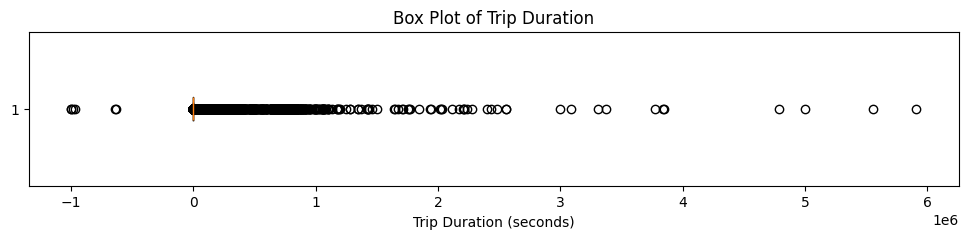

In [17]:
#Now, let´s see outliers with the boxplot graph

plt.figure(figsize=(12, 2))
plt.boxplot(trips_df['duration_seconds'], vert=False)
plt.title('Box Plot of Trip Duration')
plt.xlabel('Trip Duration (seconds)')
plt.show()

In [18]:
# Print the number of trips with duration greater than 3,000,000 seconds
long_duration_trips = trips_df[trips_df['duration_seconds'] > 3000000]
num_long_duration_trips = len(long_duration_trips)
print("Number of trips with duration greater than 3,000,000 seconds:", num_long_duration_trips)

# Print the number of trips with negative duration 
negative_duration_trips = trips_df[trips_df['duration_seconds'] < 0]
num_negative_duration_trips = len(negative_duration_trips)
print("Number of trips with negative duration:", num_negative_duration_trips)

Number of trips with duration greater than 3,000,000 seconds: 10
Number of trips with negative duration: 296


Wow, it seems there are some outliers. About 10 trips had a duration over 3M seconds, which almost 35 days. Although perhaps no human or software error caused these, I will remove them from my analysys since they might affect my results. 

Also, there are negative duration trips, which is... odd. Gonna check what happened. 

In [19]:
negative_duration_trips.sort_values(by='duration_seconds').head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_date,ended_date,started_time,ended_time,weekday,duration,duration_seconds
4981740,F584D47AE67FD388,classic_bike,2023-11-05 21:08:17,2023-10-25 07:31:46,Sheffield Ave & Waveland Ave,TA1307000126,NaN,NaN,41.949288,-87.654462,41.95,-87.65,casual,2023-11-05,2023-10-25,21:08:17,07:31:46,6,-12 days +10:23:29,-999391.0
5019394,AE046C379C20B7CA,classic_bike,2023-11-05 20:46:59,2023-10-25 07:31:46,Sheridan Rd & Irving Park Rd,13063,NaN,NaN,41.954297,-87.654399,41.95,-87.65,member,2023-11-05,2023-10-25,20:46:59,07:31:46,6,-12 days +10:44:47,-998113.0
4998813,A21D6507DA3C5AD4,classic_bike,2023-11-05 16:41:54,2023-10-25 07:31:46,Pine Grove Ave & Irving Park Rd,TA1308000022,NaN,NaN,41.954397,-87.648046,41.95,-87.65,member,2023-11-05,2023-10-25,16:41:54,07:31:46,6,-12 days +14:49:52,-983408.0
4994590,DEC5EF8DE27398A0,classic_bike,2023-11-05 11:56:19,2023-10-25 07:31:46,Pine Grove Ave & Irving Park Rd,TA1308000022,NaN,NaN,41.954360,-87.648109,41.95,-87.65,casual,2023-11-05,2023-10-25,11:56:19,07:31:46,6,-12 days +19:35:27,-966273.0
5018532,7850F6E2343BF766,classic_bike,2023-11-01 16:38:10,2023-10-25 07:31:46,Clark St & Drummond Pl,TA1307000142,NaN,NaN,41.931195,-87.644212,41.93,-87.64,casual,2023-11-01,2023-10-25,16:38:10,07:31:46,2,-8 days +14:53:36,-637584.0


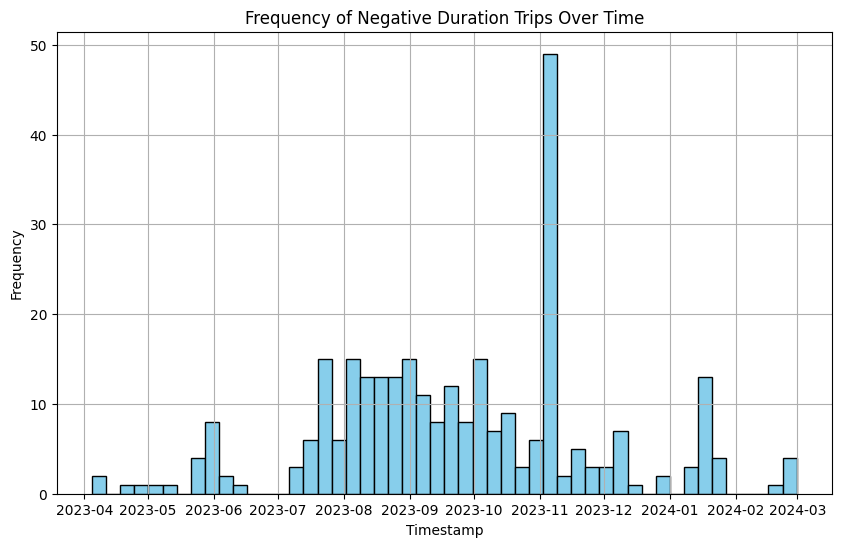

In [20]:
# Is there a specific day with smany negative cases?

plt.figure(figsize=(10, 6))
negative_duration_trips['started_at'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Frequency of Negative Duration Trips Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()


In [21]:
date_counts = negative_duration_trips['started_date'].value_counts()

print(date_counts)

started_date
2023-11-05    49
2024-01-17    10
2023-08-12     7
2023-08-19     6
2023-09-03     5
              ..
2023-08-20     1
2023-08-15     1
2023-08-05     1
2023-08-31     1
2024-02-29     1
Name: count, Length: 136, dtype: int64


Again, I can't draw conclusions from this data. But surely it is something to communicate with the stakeholders. 

For the time being, I will remove those outliners as well. 

In [22]:
#Removing duration trips with negative duration or duration over 3M seconds (35 days)
clean_df = trips_df[(trips_df['duration_seconds'] > 0) | (trips_df['duration_seconds'] < 3000000)]

clean_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_date,ended_date,started_time,ended_time,weekday,duration,duration_seconds
0,6842AA605EE9FBB3,electric_bike,2023-03-16 08:20:34,2023-03-16 08:22:52,Clark St & Armitage Ave,13146,Larrabee St & Webster Ave,13193,41.918413,-87.636451,41.921822,-87.644140,member,2023-03-16,2023-03-16,08:20:34,08:22:52,3,0 days 00:02:18,138.0
1,F984267A75B99A8C,electric_bike,2023-03-04 14:07:06,2023-03-04 14:15:31,Public Rack - Kedzie Ave & Argyle St,491,NaN,NaN,41.970000,-87.710000,41.950000,-87.710000,member,2023-03-04,2023-03-04,14:07:06,14:15:31,5,0 days 00:08:25,505.0
2,FF7CF57CFE026D02,classic_bike,2023-03-31 12:28:09,2023-03-31 12:38:47,Orleans St & Chestnut St (NEXT Apts),620,Clark St & Randolph St,TA1305000030,41.898203,-87.637536,41.884576,-87.631890,member,2023-03-31,2023-03-31,12:28:09,12:38:47,4,0 days 00:10:38,638.0
3,6B61B916032CB6D6,classic_bike,2023-03-22 14:09:08,2023-03-22 14:24:51,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Kingsbury St,13154,41.888716,-87.644448,41.910522,-87.653106,member,2023-03-22,2023-03-22,14:09:08,14:24:51,2,0 days 00:15:43,943.0
4,E55E61A5F1260040,electric_bike,2023-03-09 07:15:00,2023-03-09 07:26:00,Walsh Park,18067,Sangamon St & Lake St,TA1306000015,41.914480,-87.668013,41.885779,-87.651025,member,2023-03-09,2023-03-09,07:15:00,07:26:00,3,0 days 00:11:00,660.0


# Analysis: How members and casual riders use Cyclistic differently?


# 1. Casuals' rides are longer

In [23]:
# Filter trips by member and casual riders
member_trips = clean_df[clean_df['member_casual'] == 'member']
casual_trips = clean_df[clean_df['member_casual'] == 'casual']

# Calculate mean, median, and mode for member and casual trips
member_mean = member_trips['duration_seconds'].mean()
member_median = member_trips['duration_seconds'].median()
member_mode = member_trips['duration_seconds'].mode()

casual_mean = casual_trips['duration_seconds'].mean()
casual_median = casual_trips['duration_seconds'].median()
casual_mode = casual_trips['duration_seconds'].mode()

# Print the results
print("Member Trip Statistics:")
print("Mean:", member_mean/60)
print("Median:", member_median/60)
print("Mode:", member_mode/60)

print("Casual Trip Statistics:")
print("Mean:", casual_mean/60)
print("Median:", casual_median/60)
print("Mode:", casual_mode/60)

Member Trip Statistics:
Mean: 12.735237047704674
Median: 8.566666666666666
Mode: 0    4.866667
Name: duration_seconds, dtype: float64
Casual Trip Statistics:
Mean: 28.281406236418206
Median: 11.9
Mode: 0    6.133333
Name: duration_seconds, dtype: float64


We can see that members make shorter trips than the casual riders. 

# 2. Casuals ride electric bikes more often

In [24]:
# Create a pivot table with rideable_type as rows, member_casual as columns, and count of rows as values
pivot_table = trips_df.pivot_table(index='rideable_type', columns='member_casual', aggfunc='size', fill_value=0)

# Calculate total number of trips for casuals and members
total_casual_trips = pivot_table['casual'].sum()
total_member_trips = pivot_table['member'].sum()

# Calculate percentages
pivot_table['casual_percentage'] = pivot_table['casual'] / total_casual_trips * 100
pivot_table['member_percentage'] = pivot_table['member'] / total_member_trips * 100

# Display the pivot table
print(pivot_table)

member_casual   casual   member  casual_percentage  member_percentage
rideable_type                                                        
classic_bike    885700  1846968          43.251759          50.472019
docked_bike      74354        0           3.630960           0.000000
electric_bike  1087724  1812422          53.117281          49.527981


Interesting. Casual members use electric bikes quite more often than members. 

# 3. Casuals ride more often during the weekends. 
Members ride more often during the weekdays. 

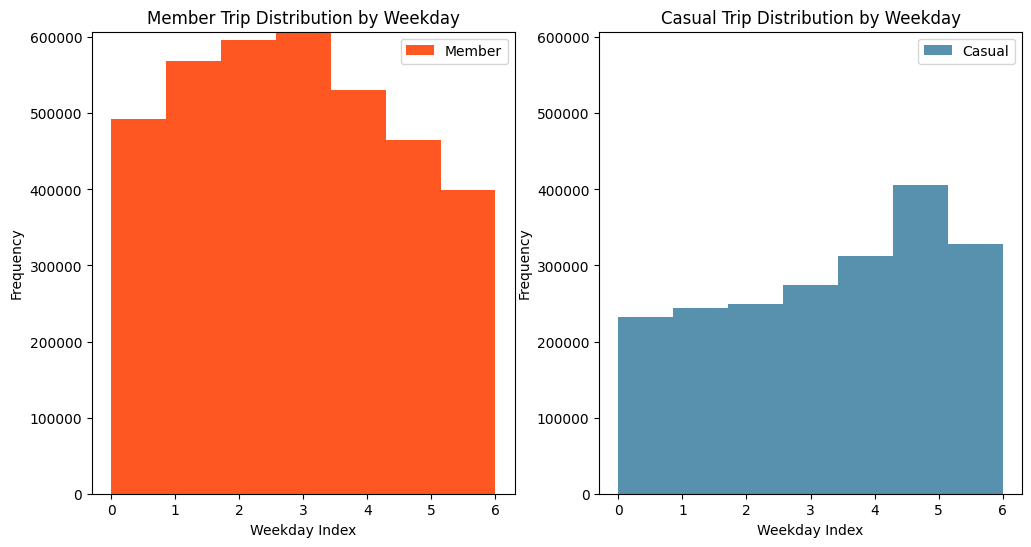

In [25]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for member trips
member_freq, member_bins, _ = axs[0].hist(member_trips['weekday'], bins=7, alpha=1, color='#ff5722', label='Member')
axs[0].set_title('Member Trip Distribution by Weekday')
axs[0].set_xlabel('Weekday Index')
axs[0].set_ylabel('Frequency')
axs[0].legend()

# Plot histogram for casual trips
casual_freq, casual_bins, _ = axs[1].hist(casual_trips['weekday'], bins=7, alpha=1, color='#5891ad', label='Casual')
axs[1].set_title('Casual Trip Distribution by Weekday')
axs[1].set_xlabel('Weekday Index')
axs[1].set_ylabel('Frequency')
axs[1].legend()

# Find maximum frequency from both histograms
max_freq = max(max(member_freq), max(casual_freq))

# Set the same Y-axis limit for both subplots
for ax in axs:
    ax.set_ylim(0, max_freq)

plt.show()

We can see that casual riders use Cyclist most often during the weekend, specially on Saturday. Whereas the opposite is true for the members. We can assume that this is because members use for commuting, while casuals for leisure. 

# 4. All users ride more often in Summer/Spring

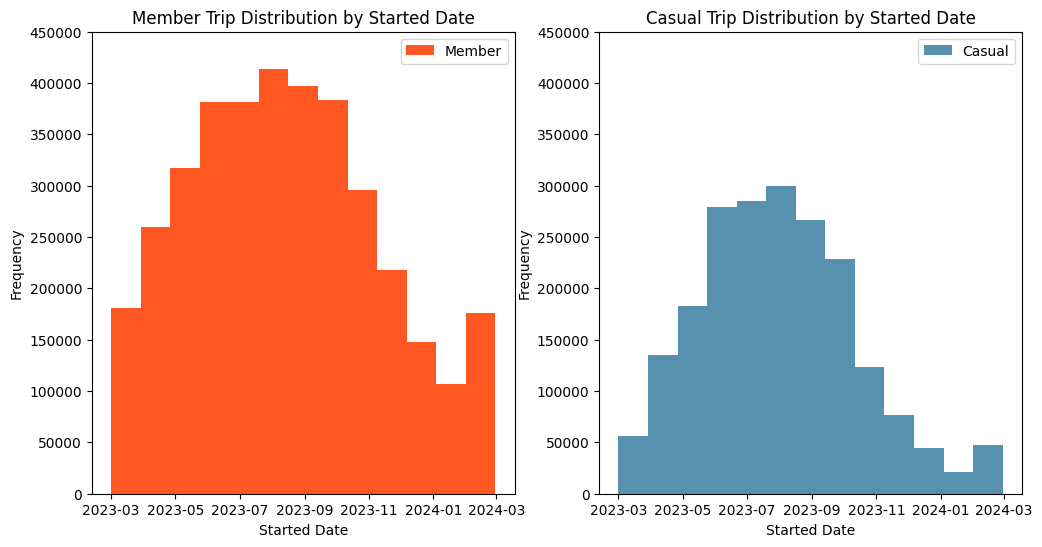

In [33]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for member trips
axs[0].hist(member_trips['started_date'],bins=13, alpha=1, color='#ff5722', label='Member')
axs[0].set_title('Member Trip Distribution by Started Date')
axs[0].set_xlabel('Started Date')
axs[0].set_ylabel('Frequency')
axs[0].legend()

# Plot histogram for casual trips
axs[1].hist(casual_trips['started_date'],bins=13, alpha=1, color='#5891ad', label='Casual')
axs[1].set_title('Casual Trip Distribution by Started Date')
axs[1].set_xlabel('Started Date')
axs[1].set_ylabel('Frequency')
axs[1].legend()

# Set the same Y-axis limit for both subplots

for ax in axs:
    ax.set_ylim(0, 450000)

plt.show()

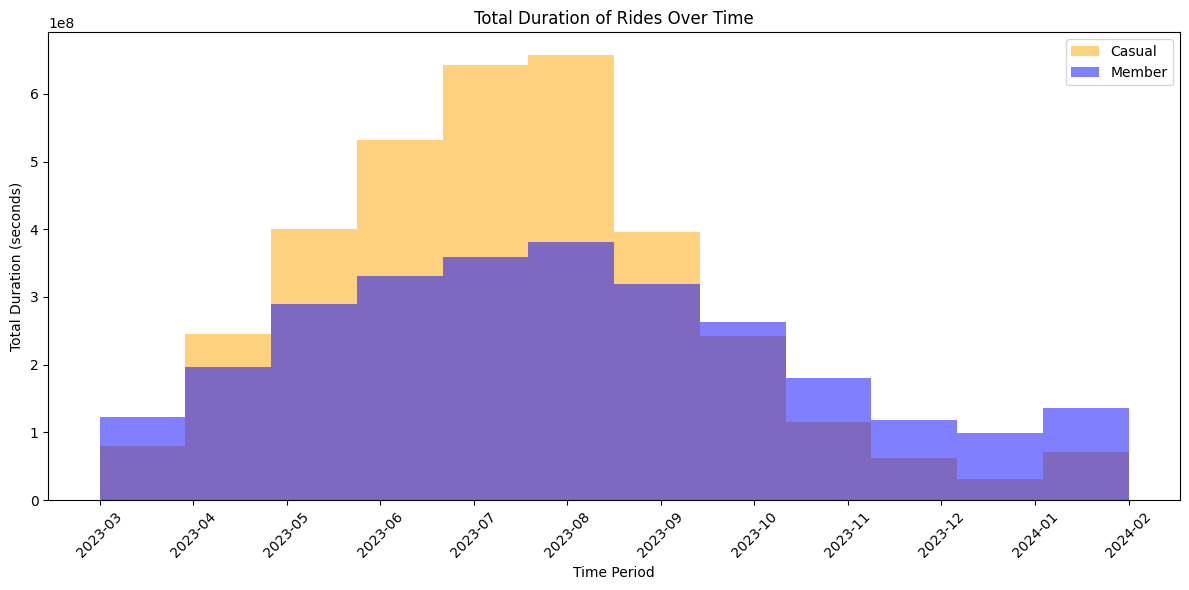

In [28]:
# Convert started_at column to datetime if it's not already
trips_df['started_at'] = pd.to_datetime(trips_df['started_at'])

# Group the DataFrame by time period (e.g., month or day) and calculate the sum of duration_seconds for casual and member trips separately
duration_sum_casual = trips_df[trips_df['member_casual'] == 'casual'].groupby(trips_df['started_at'].dt.to_period('M'))['duration_seconds'].sum()
duration_sum_member = trips_df[trips_df['member_casual'] == 'member'].groupby(trips_df['started_at'].dt.to_period('M'))['duration_seconds'].sum()

# Plot histograms for casual and member trips
plt.figure(figsize=(12, 6))

# Plot histogram for casual trips
plt.hist(duration_sum_casual.index.strftime('%Y-%m'), bins=len(duration_sum_casual), weights=duration_sum_casual, alpha=0.5, color='#ff5722', label='Casual')

# Plot histogram for member trips
plt.hist(duration_sum_member.index.strftime('%Y-%m'), bins=len(duration_sum_member), weights=duration_sum_member, alpha=0.5, color='#5891ad', label='Member')

plt.title('Total Duration of Rides Over Time')
plt.xlabel('Time Period')
plt.ylabel('Total Duration (seconds)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Notably, the behaviour of casuals and members is very similar throughtout the months of the year. Both use Cyclistic more during Summer/Spring and less during winter. 

The time members spend riding is more over the year, whereas in the casuals case, their use spikes in Summer (overpassing Member's riding) and falls below average in winter. 

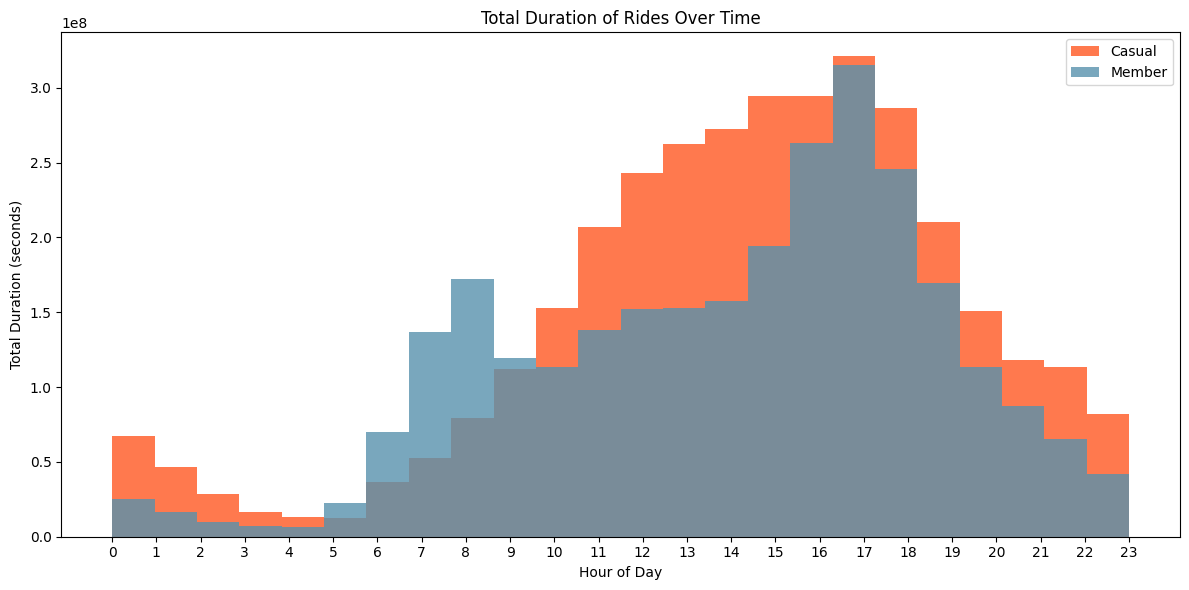

In [41]:
# Group the DataFrame by time period (e.g., hour or minute) and calculate the sum of duration_seconds for casual and member trips separately
duration_sum_casual = trips_df[trips_df['member_casual'] == 'casual'].groupby(trips_df['started_time'].apply(lambda x: x.hour))['duration_seconds'].sum()
duration_sum_member = trips_df[trips_df['member_casual'] == 'member'].groupby(trips_df['started_time'].apply(lambda x: x.hour))['duration_seconds'].sum()

# Plot histograms for casual and member trips
plt.figure(figsize=(12, 6))

# Plot histogram for casual trips
plt.hist(duration_sum_casual.index, bins=len(duration_sum_casual), weights=duration_sum_casual, alpha=0.8, color='#ff5722', label='Casual')

# Plot histogram for member trips
plt.hist(duration_sum_member.index, bins=len(duration_sum_member), weights=duration_sum_member, alpha=0.8, color='#5891ad', label='Member')

plt.title('Total Duration of Rides Over Time')
plt.xlabel('Hour of Day')
plt.ylabel('Total Duration (seconds)')
plt.legend()
plt.xticks(range(24))
plt.tight_layout()
plt.show()

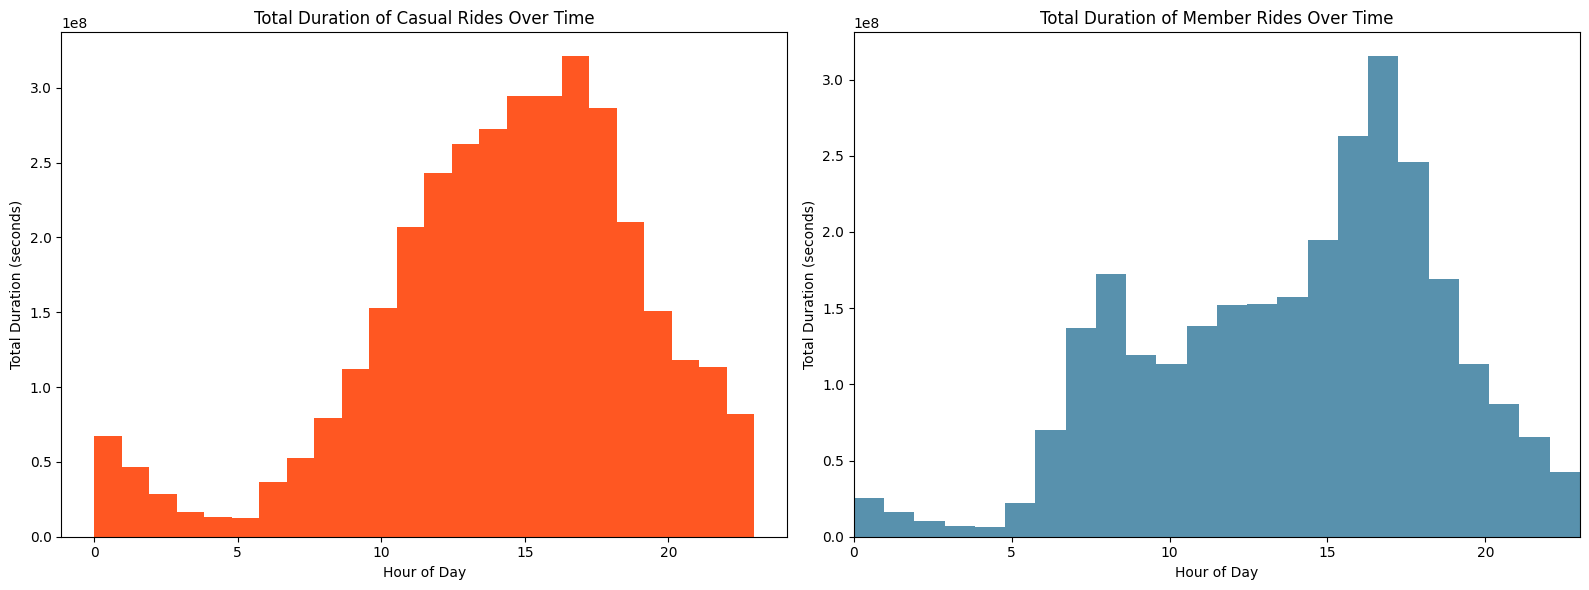

In [39]:
# Group the DataFrame by time period (e.g., hour or minute) and calculate the sum of duration_seconds for casual and member trips separately
duration_sum_casual = trips_df[trips_df['member_casual'] == 'casual'].groupby(trips_df['started_time'].apply(lambda x: x.hour))['duration_seconds'].sum()
duration_sum_member = trips_df[trips_df['member_casual'] == 'member'].groupby(trips_df['started_time'].apply(lambda x: x.hour))['duration_seconds'].sum()

# Create subplots for casual and member trips
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot histogram for casual trips
axs[0].hist(duration_sum_casual.index, bins=len(duration_sum_casual), weights=duration_sum_casual, alpha=1, color='#ff5722')
axs[0].set_title('Total Duration of Casual Rides Over Time')
axs[0].set_xlabel('Hour of Day')
axs[0].set_ylabel('Total Duration (seconds)')

# Plot histogram for member trips
axs[1].hist(duration_sum_member.index, bins=len(duration_sum_member), weights=duration_sum_member, alpha=1, color='#5891ad')
axs[1].set_title('Total Duration of Member Rides Over Time')
axs[1].set_xlabel('Hour of Day')
axs[1].set_ylabel('Total Duration (seconds)')

# Set the same x-axis limits for both subplots
plt.xlim(0, 23)

plt.tight_layout()
plt.show()

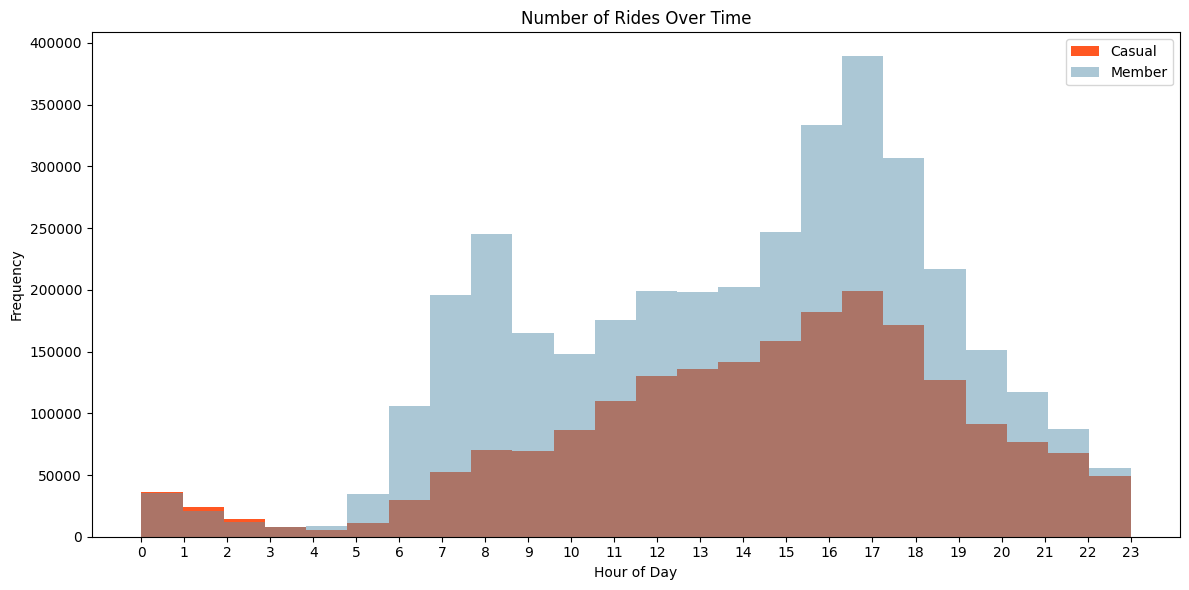

In [36]:
# Group the DataFrame by time period (e.g., hour or minute) and count the number of rides for casual and member trips separately
ride_count_casual = trips_df[trips_df['member_casual'] == 'casual'].groupby(trips_df['started_time'].apply(lambda x: x.hour)).size()
ride_count_member = trips_df[trips_df['member_casual'] == 'member'].groupby(trips_df['started_time'].apply(lambda x: x.hour)).size()

# Plot histograms for casual and member trips
plt.figure(figsize=(12, 6))

# Plot histogram for casual trips
plt.hist(ride_count_casual.index, bins=len(ride_count_casual), weights=ride_count_casual, alpha=1, color='#ff5722', label='Casual')

# Plot histogram for member trips
plt.hist(ride_count_member.index, bins=len(ride_count_member), weights=ride_count_member, alpha=0.5, color='#5891ad', label='Member')

plt.title('Number of Rides Over Time')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(range(24))
plt.tight_layout()
plt.show()

# Conclusions 

1. Casuals' rides are longer
2. Casuals ride electric bikes more often
3. Casuals ride more often during the weekends.
4. All users ride more often in Summer/Spring
5. Members use Cyclistic for commuting, casuals for leisure. 

For the final recommendation, check the following slides:
[Slides: How to retain casual riders?](hhttps://docs.google.com/presentation/d/1IE386uC3QlkXFvFhFRs12biEb2HtTyyzP2GcZe_Te0c/edit?usp=sharing)
